## STATS 131 - Group Project
### Datasets:
* GDP_and_GDP_Per_Capita.csv (1)
* Expenditure_on_Health.csv (2)
* Production_Trade_and_Supply_of_Energy.csv (3)
* Internet_Usage.csv (4)
* Public_Expenditure_on_Education.csv (5)
* Tourist_Visitors_Arrival_and_Expenditure.csv (6)
* GDP_on_R&D.csv (7)
* Exchange_Rates.csv (8)
* Consumer_Price_Index.csv (9)

### Variables:
* response: CPI (9)
* predictors:
    - GDP (1)
    - expenditure on health (2)
    - energy usage (3)
    - Internet usage (4)
    - expenditure on education (5)
    - expenditure on tourism (6)
    - expenditure on science & technology (7)
    - exchange rate (8)
    
### Dataset sources:
United Nations: http://data.un.org/
- National accounts (1)
    - GDP and GDP per capita
- Nutrition and health (2)
    - Health expenditure
- Energy (3)
    - Energy production, trade and consumption
- Communication (4)
    - Internet usage
- Education (5)
    - Public expenditure on education
- Science and technology (7)
    - Human resources in R & D
- Finance (8)
    - Exchange rates
- Price and production indices (9)
    - Consumer price indices
   
### Objective:
To predict CPI (customer price index) of a country by using predictors that are relevant to the economic growth.

### Exploratory Data Analysis and Data Clean-up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CPI = pd.read_csv("Consumer_Price_Index.csv", encoding ="ISO-8859-1")
CPI.Series.unique()  # to extra certain rows
CPI = CPI.loc[CPI.Series == 'Consumer price index: General']
countries = CPI.Country.unique()
CPI.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Consumer price index: General,71.1
1,4,Afghanistan,2010,Consumer price index: General,100
2,4,Afghanistan,2014,Consumer price index: General,133.1
3,4,Afghanistan,2015,Consumer price index: General,132.1
4,4,Afghanistan,2016,Consumer price index: General,137.9


In [3]:
health = pd.read_csv("Expenditure_on_Health.csv", encoding ="ISO-8859-1")
health = health.loc[health.Series == 'Current health expenditure (% of GDP)']
health.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6
2,4,Afghanistan,2013,Current health expenditure (% of GDP),8.8
3,4,Afghanistan,2014,Current health expenditure (% of GDP),9.7
4,4,Afghanistan,2015,Current health expenditure (% of GDP),10.3


In [4]:
GDP = pd.read_csv("GDP_and_GDP_Per_Capita.csv", encoding ="ISO-8859-1")
gdp = GDP.loc[GDP.Series == "GDP per capita (US dollars)"]

In [5]:
energy = pd.read_csv("Production_Trade_and_Supply_of_Energy.csv", encoding ="ISO-8859-1" )
energy = energy.loc[energy.Series == "Primary energy production (petajoules)"]

In [6]:
internet = pd.read_csv("Internet_Usage.csv", encoding ="ISO-8859-1" )

In [7]:
education = pd.read_csv("Public_Expenditure_on_Education.csv", encoding ="ISO-8859-1" )
education.loc[education.Series == 'Current expenditure other than staff compensation as % of total expenditure in public institutions (%)']
education = education.loc[education.Series == "Public expenditure on education (% of government expenditure)"]

In [8]:
tourism = pd.read_csv("Tourist_Visitors_Arrival_and_Expenditure.csv", encoding ="ISO-8859-1" )
tourism = tourism.loc[tourism.Series == "Tourism expenditure (millions of US dollars)"]

In [9]:
technology = pd.read_csv("GDP_on_R&D.csv", encoding ="ISO-8859-1" )
tech = technology.loc[technology.Series == 'Gross domestic expenditure on R & D: as a percentage of GDP (%)']

In [10]:
rates = pd.read_csv("Exchange_Rates.csv", encoding ="ISO-8859-1" )
rates = rates.loc[rates.Series == "Exchange rates: period average (national currency per US dollar)"]

In [11]:
gdp.pivot(index = "Year", columns = "Country", values = "Value").head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zanzibar,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1985,282.0,783.0,2564.0,9837.0,859.0,4072.0,3508.0,3144.0,NaN,6108.0,...,18017.0,1735.0,NaN,1020.0,3425.0,79.0,NaN,399.0,NaN,872.0
1995,189.0,770.0,1452.0,23359.0,466.0,10583.0,7841.0,7993.0,426.0,16442.0,...,28758.0,6609.0,589.0,1621.0,3375.0,276.0,387.0,417.0,235.0,846.0
2005,264.0,2615.0,3100.0,41281.0,1891.0,18129.0,11453.0,5125.0,1753.0,23303.0,...,44173.0,5221.0,543.0,1886.0,5433.0,684.0,925.0,691.0,408.0,481.0
2010,558.0,4056.0,4463.0,39734.0,3586.0,19459.0,12175.0,10346.0,3432.0,23513.0,...,48574.0,11938.0,1382.0,2966.0,13566.0,1310.0,1309.0,1463.0,587.0,720.0
2015,611.0,3895.0,4163.0,36040.0,4171.0,22622.0,13602.0,14853.0,3618.0,25796.0,...,56948.0,15525.0,2160.0,2871.0,11054.0,2065.0,990.0,1319.0,795.0,1033.0


In [12]:
energy.pivot(index = "Year", columns = "Country", values = "Value").head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1990,19.0,99.0,4380.0,0.0,1198.0,0.0,NaN,2064.0,NaN,0.0,...,NaN,68588.0,51.0,NaN,0.0,5953.0,787.0,NaN,207.0,372.0
1995,16.0,43.0,4748.0,0.0,1585.0,0.0,NaN,2722.0,10.0,0.0,...,NaN,68963.0,45.0,2045.0,1.0,7962.0,1136.0,713.0,224.0,362.0
2000,18.0,34.0,6556.0,0.0,1803.0,0.0,NaN,3404.0,27.0,5.0,...,NaN,69339.0,46.0,2307.0,1.0,8965.0,1733.0,908.0,248.0,379.0
2005,23.0,48.0,7534.0,0.0,2934.0,0.0,NaN,3609.0,36.0,5.0,...,NaN,68124.0,45.0,2446.0,1.0,8283.0,2612.0,844.0,280.0,379.0
2010,41.0,69.0,6200.0,1.0,4085.0,0.0,0.0,3343.0,52.0,5.0,...,NaN,71893.0,89.0,2309.0,1.0,8139.0,2747.0,804.0,319.0,369.0


In [13]:
CPI = CPI.pivot(index = "Year", columns = "Country", values = "Value")
GDP = gdp.pivot(index = "Year", columns = "Country", values = "Value")
energy = energy.pivot(index = "Year", columns = "Country", values = "Value")
health = health.pivot(index = "Year", columns = "Country", values = "Value")
education = education.pivot(index = "Year", columns = "Country", values = "Value")
tech = tech.pivot(index = "Year", columns = "Country", values = "Value")
internet = internet.pivot(index = "Year", columns = "Country", values = "Value")
rates = rates.pivot(index = "Year", columns = "Country", values = "Value")
tourism = tourism.pivot(index = "Year", columns = "Country", values = "Value")

In [14]:
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurin. State of)' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China, Hong Kong SAR'
 'China, Macao SAR' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Côte d\x92Ivoire' 'Croatia' 'Curaçao' 'Cyprus' 'Czechia'
 'Dem. Rep. of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Grenada' 'Guadeloupe' 'Guam' 'Guatemala' 'Guin

In [15]:
name = 'Albania'
table = pd.DataFrame(CPI.loc[:, name])
table = table.join(pd.DataFrame(GDP.loc[:, name]), lsuffix='CPI', rsuffix='GDP')
table = table.join(pd.DataFrame(energy.loc[:, name]), lsuffix='GDP', rsuffix='Energy')
table = table.join(pd.DataFrame(tech.loc[:, name]), lsuffix = "Energy", rsuffix='Tech')
table = table.join(pd.DataFrame(education.loc[:, name]), lsuffix = "Tech", rsuffix='Education')
table = table.join(pd.DataFrame(rates.loc[:, name]), lsuffix = "Education", rsuffix='rates')
table = table.join(pd.DataFrame(internet.loc[:, name]), lsuffix = "Rates", rsuffix='Internet')
table = table.join(pd.DataFrame(tourism.loc[:, name]), lsuffix = "Internet", rsuffix='Tourism')
table = table.join(pd.DataFrame(health.loc[:, name]), lsuffix = "Tourism", rsuffix='Health')
table.fillna(method = "ffill", inplace = True)
table.fillna(method = "bfill", inplace = True)
table

,AlbaniaCPI,AlbaniaGDP,AlbaniaEnergy,AlbaniaTech,AlbaniaEducation,Albaniarates,AlbaniaInternet,AlbaniaTourism,Albania
Year,,,,,,,,,
1995,40.7,770.0,43.0,NaN,11.4,92.7,6.0,70.0,6.3
2005,86.7,2615.0,48.0,NaN,11.4,99.9,6.0,880.0,6.3
2010,100,4056.0,69.0,NaN,11.4,103.9,45.0,1778.0,5.0
2014,109.3,4056.0,85.0,NaN,11.4,105.5,60.1,1778.0,7.0
2015,111.4,3895.0,88.0,NaN,11.3,126,63.3,1613.0,6.8
2016,112.8,4061.0,82.0,NaN,11.3,124.1,66.4,1820.0,6.8
2017,115.1,4450.0,82.0,NaN,11.3,119.1,71.8,2049.0,6.8


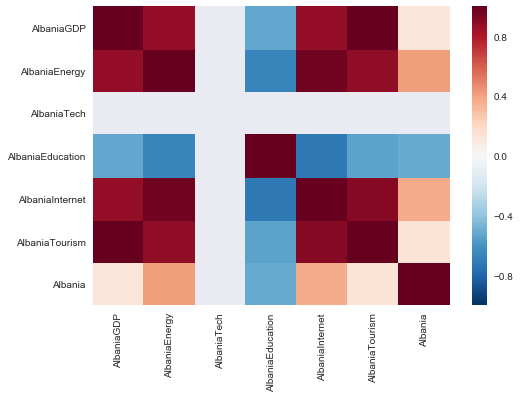

In [16]:
corr = table.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [17]:
name = 'Finland'
table1 = pd.DataFrame(CPI.loc[:, name])
table1 = table1.join(pd.DataFrame(GDP.loc[:, name]), lsuffix='CPI', rsuffix='GDP')
table1 = table1.join(pd.DataFrame(energy.loc[:, name]), lsuffix='GDP', rsuffix='Energy')
table1 = table1.join(pd.DataFrame(tech.loc[:, name]), lsuffix = "Energy", rsuffix='Tech')
table1 = table1.join(pd.DataFrame(education.loc[:, name]), lsuffix = "Tech", rsuffix='Education')
table1 = table1.join(pd.DataFrame(rates.loc[:, name]), lsuffix = "Education", rsuffix='rates')
table1 = table1.join(pd.DataFrame(internet.loc[:, name]), lsuffix = "Rates", rsuffix='Internet')
table1 = table1.join(pd.DataFrame(tourism.loc[:, name]), lsuffix = "Internet", rsuffix='Tourism')
table1 = table1.join(pd.DataFrame(health.loc[:, name]), lsuffix = "Tourism", rsuffix='Health')
table1.fillna(method = "ffill", inplace = True)
table1.fillna(method = "bfill", inplace = True)

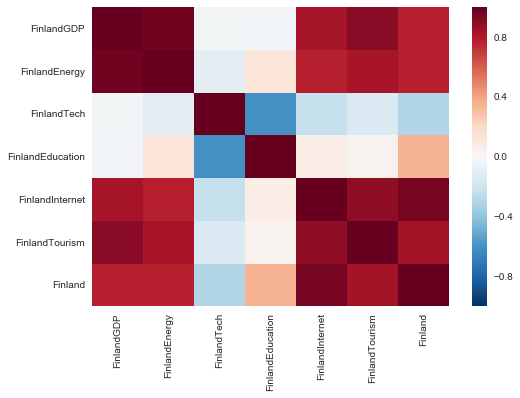

In [18]:
corr = table1.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [19]:
name = 'Albania'
table = pd.DataFrame(CPI.loc[:, name])
table = pd.concat([table, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table = table.swaplevel().unstack()
table.fillna(method = "ffill", inplace = True)
table.fillna(method = "bfill", inplace = True)
table

Albania                                                 
      Energy    Tech Education Rates Internet Tourism  Health
Year                                                         
1985    40.7   783.0      99.0   0.2     92.7     0.1    70.0
1990    40.7   783.0      99.0   0.2     92.7     0.1    70.0
1995    40.7   770.0      43.0   0.2     92.7     0.1    70.0
2000    40.7   770.0      34.0   0.2     92.7     0.1    70.0
2001    40.7   770.0      34.0   0.2     92.7     0.1    70.0
2002    40.7   770.0      34.0   0.2     92.7     0.1    70.0
2003    40.7   770.0      34.0   0.2     92.7     0.1    70.0
2004    40.7   770.0      34.0   0.2     92.7     0.1    70.0
2005    86.7  2615.0      48.0   0.2     99.9     6.0   880.0
2006    86.7  2615.0      48.0   0.2     99.9     6.0   880.0
2007    86.7  2615.0      48.0   0.2     99.9     6.0   880.0
2008    86.7  2615.0      48.0   0.2     99.9     6.0   880.0
2009    86.7  2615.0      48.0   0.2     99.9     6.0   880.0
2010     100  4056.0      69.0   0.2    103.9    45.0  1778.0
2011     100  4056.0      69.0   0.2    103.9    45.0  1778.0
2012     100  4056.0      69.0   0.2    103.9    45.0  1778.0
2013     100  4056.0      69.0   0.2    103.9    45.0  1778.0
2014   109.3  4056.0      85.0   0.2    105.5    60.1  1778.0
2015   111.4  3895.0      88.0   0.2      126    63.3  1613.0
2016   112.8  4061.0      82.0   0.2    124.1    66.4  1820.0
2017   115.1  4450.0      82.0   0.2    119.1    71.8  2049.0

In [20]:
name = 'Finland'
table0 = pd.DataFrame(CPI.loc[:, name])
table0 = pd.concat([table0, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(education.loc[:, name]), pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table0 = table0.swaplevel().unstack()
table0.fillna(method = "ffill", inplace = True)
table0.fillna(method = "bfill", inplace = True)
table0

Finland                                                 
      Energy     Tech Education Rates Internet Tourism Health
Year                                                         
1985      80  11385.0     504.0   3.3     12.2     0.8   37.2
1990      80  11385.0     504.0   3.3     12.2     0.8   37.2
1995      80  26215.0     549.0   3.3     12.2     0.8   37.2
2000      80  26215.0     622.0   3.3     12.2     0.8   37.2
2001      80  26215.0     622.0   3.3     12.2     0.8   37.2
2002      80  26215.0     622.0   3.3     12.2     0.8   37.2
2003      80  26215.0     622.0   3.3     12.2     0.8   37.2
2004      80  26215.0     622.0   3.3     12.2     0.8   37.2
2005    91.2  38873.0     699.0   3.3     12.2     0.8   74.5
2006    91.2  38873.0     699.0   3.3     12.2     0.8   74.5
2007    91.2  38873.0     699.0   3.3     12.2     0.8   74.5
2008    91.2  38873.0     699.0   3.3     12.2     0.8   74.5
2009    91.2  38873.0     699.0   3.3     12.2     0.8   74.5
2010     100  46181.0     727.0   3.7     11.9     0.8   86.9
2011     100  46181.0     727.0   3.7     11.9     0.8   86.9
2012     100  46181.0     727.0   3.7     11.9     0.8   86.9
2013     100  46181.0     727.0   3.7     11.9     0.8   86.9
2014     109  46181.0     759.0   3.7     12.3     0.8   86.5
2015   108.8  42405.0     734.0   2.9     12.3     0.9   86.4
2016   109.2  43439.0     738.0   2.7     12.3     0.9   87.7
2017     110  45670.0     738.0   2.7     12.3     0.9   87.5

In [21]:
name = 'Russian Federation'
table1 = pd.DataFrame(CPI.loc[:, name])
table1 = pd.concat([table1, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table1 = table1.swaplevel().unstack()
table1.fillna(method = "ffill", inplace = True)
table1.fillna(method = "bfill", inplace = True)

In [22]:
name = 'New Zealand'
table2 = pd.DataFrame(CPI.loc[:, name])
table2 = pd.concat([table2, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table2 = table2.swaplevel().unstack()
table2.fillna(method = "ffill", inplace = True)
table2.fillna(method = "bfill", inplace = True)

In [23]:
name = 'United Kingdom'
table3 = pd.DataFrame(CPI.loc[:, name])
table3 = pd.concat([table3, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table3 = table3.swaplevel().unstack()
table3.fillna(method = "ffill", inplace = True)
table3.fillna(method = "bfill", inplace = True)

In [24]:
name = 'United States of America'
table4 = pd.DataFrame(CPI.loc[:, name])
table4 = pd.concat([table4, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Internet", "Tourism", "Health"])
table4 = table4.swaplevel().unstack()
table4.fillna(method = "ffill", inplace = True)
table4.fillna(method = "bfill", inplace = True)

In [25]:
name = 'China'
table5 = pd.DataFrame(CPI.loc[:, name])
table5 = pd.concat([table5, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Rates", "Internet", "Tourism", "Health"])
table5 = table5.swaplevel().unstack()
table5.fillna(method = "ffill", inplace = True)
table5.fillna(method = "bfill", inplace = True)

In [26]:
name = 'Poland'
table6 = pd.DataFrame(CPI.loc[:, name])
table6 = pd.concat([table6, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(education.loc[:, name]), pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table6 = table6.swaplevel().unstack()
table6.fillna(method = "ffill", inplace = True)
table6.fillna(method = "bfill", inplace = True)

In [27]:
name = 'Thailand'
table7 = pd.DataFrame(CPI.loc[:, name])
table7 = pd.concat([table7, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(education.loc[:, name]), pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table7 = table7.swaplevel().unstack()
table7.fillna(method = "ffill", inplace = True)
table7.fillna(method = "bfill", inplace = True)

In [28]:
name = 'Egypt'
table8 = pd.DataFrame(CPI.loc[:, name])
table8 = pd.concat([table8, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(education.loc[:, name]), pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table8 = table8.swaplevel().unstack()
table8.fillna(method = "ffill", inplace = True)
table8.fillna(method = "bfill", inplace = True)

In [29]:
name = 'South Africa'
table9 = pd.DataFrame(CPI.loc[:, name])
table9 = pd.concat([table9, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(education.loc[:, name]), pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
table9 = table9.swaplevel().unstack()
table9.fillna(method = "ffill", inplace = True)
table9.fillna(method = "bfill", inplace = True)

In [30]:
frame = pd.concat([table, table1, table2, table3, table4, table5, table6, table7, table8, table9], axis = 1)
frame.fillna(0)
frame

Albania                                                   \
      Energy    Tech Education Rates Internet Tourism  Health   
Year                                                            
1985    40.7   783.0      99.0   0.2     92.7     0.1    70.0   
1990    40.7   783.0      99.0   0.2     92.7     0.1    70.0   
1995    40.7   770.0      43.0   0.2     92.7     0.1    70.0   
2000    40.7   770.0      34.0   0.2     92.7     0.1    70.0   
2001    40.7   770.0      34.0   0.2     92.7     0.1    70.0   
2002    40.7   770.0      34.0   0.2     92.7     0.1    70.0   
2003    40.7   770.0      34.0   0.2     92.7     0.1    70.0   
2004    40.7   770.0      34.0   0.2     92.7     0.1    70.0   
2005    86.7  2615.0      48.0   0.2     99.9     6.0   880.0   
2006    86.7  2615.0      48.0   0.2     99.9     6.0   880.0   
2007    86.7  2615.0      48.0   0.2     99.9     6.0   880.0   
2008    86.7  2615.0      48.0   0.2     99.9     6.0   880.0   
2009    86.7  2615.0      48.0   0.2     99.9     6.0   880.0   
2010     100  4056.0      69.0   0.2    103.9    45.0  1778.0   
2011     100  4056.0      69.0   0.2    103.9    45.0  1778.0   
2012     100  4056.0      69.0   0.2    103.9    45.0  1778.0   
2013     100  4056.0      69.0   0.2    103.9    45.0  1778.0   
2014   109.3  4056.0      85.0   0.2    105.5    60.1  1778.0   
2015   111.4  3895.0      88.0   0.2      126    63.3  1613.0   
2016   112.8  4061.0      82.0   0.2    124.1    66.4  1820.0   
2017   115.1  4450.0      82.0   0.2    119.1    71.8  2049.0   

     Russian Federation                     ...      Egypt                 \
                 Energy     Tech Education  ...   Internet Tourism Health   
Year                                        ...                             
1985                6.3   2713.0   40589.0  ...       14.4     0.7    0.6   
1990                6.3   2713.0   40589.0  ...       14.4     0.7    0.6   
1995                6.3   2713.0   40589.0  ...       14.4     3.4    0.6   
2000                6.3   2713.0   41030.0  ...       14.4     3.4    0.6   
2001                6.3   2713.0   41030.0  ...       14.4     3.4    0.6   
2002                6.3   2713.0   41030.0  ...       14.4     3.4    0.6   
2003                6.3   2713.0   41030.0  ...       14.4     3.4    0.6   
2004                6.3   2713.0   41030.0  ...       14.4     3.4    0.6   
2005               61.4   5372.0   50506.0  ...       14.4     5.8   12.8   
2006               61.4   5372.0   50506.0  ...       14.4     5.8   12.8   
2007               61.4   5372.0   50506.0  ...       14.4     5.8   12.8   
2008               61.4   5372.0   50506.0  ...       10.5     5.8   12.8   
2009               61.4   5372.0   50506.0  ...       10.5     5.8   12.8   
2010                100  10757.0   53679.0  ...       10.5     5.6   21.6   
2011                100  10757.0   53679.0  ...       10.5     5.6   21.6   
2012                100  10757.0   53679.0  ...       10.5     5.6   21.6   
2013                100  10757.0   53679.0  ...       10.5     5.6   21.6   
2014              131.2  10757.0   55400.0  ...       10.5     7.1   33.9   
2015              151.5   9510.0   56024.0  ...       10.5     7.7   37.8   
2016              162.2   8924.0   57240.0  ...       10.5      10   41.2   
2017              168.2  10956.0   57240.0  ...       10.5    17.8   45.0   

     South Africa                                                  
           Energy    Tech Education Rates Internet Tourism Health  
Year                                                               
1985         43.4  1768.0    4767.0   0.9     19.9     2.2    5.3  
1990         43.4  1768.0    4767.0   0.9     19.9     2.2    5.3  
1995         43.4  3741.0    5691.0   0.9     19.9     3.6    5.3  
2000         43.4  3741.0    6153.0   0.9     19.9     3.6    5.3  
2001         43.4  3741.0    6153.0   0.9     19.9     3.6    5.3  
2002         43.4  3741.0    6153.0   0.9     19.9 

In [31]:
frame.columns.swaplevel()
frame.stack()

Albania   China  Egypt New Zealand Poland Russian Federation  \
Year                                                                          
1985 Education      99     NaN   2376         500   4350              40589   
     Energy       40.7     100   36.6        71.7    100                6.3   
     Health         70     1.8    0.6        2318    7.3               7805   
     Internet     92.7     1.3   14.4           2   12.3               28.3   
     Rates         0.2   32727    0.2         1.1    0.6                1.1   
     Tech          783     289    474        7376   1975               2713   
     Tourism       0.1     2.9    0.7        47.4      0                  2   
1990 Education      99     NaN   2376         500   4350              40589   
     Energy       40.7     100   36.6        71.7    100                6.3   
     Health         70     1.8    0.6        2318    7.3               7805   
     Internet     92.7     1.3   14.4           2   12.3               28.3   
     Rates         0.2   32727    0.2         1.1    0.6                1.1   
     Tech          783     289    474        7376   1975               2713   
     Tourism       0.1     2.9    0.7        47.4      0                  2   
1995 Education      43     NaN   2684         544   4161              40589   
     Energy       40.7     100   36.6        71.7    100                6.3   
     Health         70     1.8    0.6        2318    7.3               7805   
     Internet     92.7     1.3   14.4         1.5   12.3               28.3   
     Rates         0.2   39692    0.2         1.1    0.6                1.1   
     Tech          770     592   1032       17184   3696               2713   
     Tourism       0.1     8.4    3.4        47.4    2.4                  2   
2000 Education      34     NaN   2773         628   3318              41030   
     Energy       40.7     100   36.6        71.7    100                6.3   
     Health         70     1.8    0.6        2318    7.3               7805   
     Internet     92.7     1.3   14.4         1.5   12.3               28.3   
     Rates         0.2   40783    0.2         1.1    0.6                1.1   
     Tech          770     592   1032       17184   3696               2713   
     Tourism       0.1     8.4    3.4        47.4    2.4                  2   
2001 Education      34     NaN   2773         628   3318              41030   
     Energy       40.7     100   36.6        71.7    100                6.3   
...                ...     ...    ...         ...    ...                ...   
2013 Tech         4056    4487   2552       33543  12507              10757   
     Tourism        45     6.8    5.6        80.5      3                 43   
2014 Education      85     NaN   3240         779   2831              55400   
     Energy      109.3   113.2  142.1       107.6    109              131.2   
     Health       1778    47.9   33.9        6523   66.6              13239   
     Internet    105.5     1.7   10.5         1.2   11.6               38.4   
     Rates         0.2  101498    0.4         1.3    0.7                1.1   
     Tech         4056    4487   2552       33543  12507              10757   
     Tourism      60.1     6.1    7.1        85.5    3.2               70.5   
2015 Education      88     NaN   3051         774   2840              56024   
     Energy      111.4   114.9  156.8       107.9  108.1              151.5   
     Health       1613    50.3   37.8        9452     68              13204   
     Internet      126     1.7   10.5         1.4   11.6               60.9   
     Rates         0.2  100864    0.4         1.3      1                1.1   
     Tech         3895    7920   3388       38402  12481               9510   
     Tourism      63.3     6.2    7.7        88.2    3.8               70.1   
2016 Education      82     NaN   3105         758   2791              57240   
     Energy      112.8     102  178.5       108.6  107.6         

## Data Modeling:
### Response variable:
- CPI

### Predictor variables:
- Country ID (factor with 11 levels)
- Year (factor with 21 levels)
- GDP
- Energy expenditure
- Technology expenditure
- Eductaion expenditure
- Exchange rages
- Internet usage rate
- Tourism expenditure
- Healthcare expenditure

In [32]:
rates["United States of America"] = 1
education["China"] = np.nan

In [33]:
# G7 countires: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
# BRICS countires: Brazil, Russia, India, China and South Africa
G7 = ["United States of America", "Germany", "France", "Japan", "Canada", "United Kingdom", "Italy"]
BRICS = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
df1 = pd.DataFrame()
for name in G7: 
    table = pd.DataFrame(CPI.loc[:, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                       pd.DataFrame(education.loc[:, name]), pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                       pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df1 = pd.concat([df1, table], axis = 1)
    
df2 = pd.DataFrame()
for name in BRICS: 
    table = pd.DataFrame(CPI.loc[:, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                       pd.DataFrame(education.loc[:, name]), pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                       pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df2 = pd.concat([df2, table], axis = 1)
    
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

In [34]:
df1

United States of America                                            \
                       Energy     Tech Education Rates Internet Tourism   
Year                                                                      
1985                     69.9  18017.0   68588.0   2.5     13.1       1   
1990                     69.9  18017.0   68588.0   2.5     13.1       1   
1995                     69.9  28758.0   68963.0   2.5     13.1       1   
2000                     69.9  28758.0   69339.0   2.5     13.1       1   
2001                     69.9  28758.0   69339.0   2.5     13.1       1   
2002                     69.9  28758.0   69339.0   2.5     13.1       1   
2003                     69.9  28758.0   69339.0   2.5     13.1       1   
2004                     69.9  28758.0   69339.0   2.5     13.1       1   
2005                     89.6  44173.0   68124.0   2.5     13.1       1   
2006                     89.6  44173.0   68124.0   2.5     13.1       1   
2007                     89.6  44173.0   68124.0   2.5     13.1       1   
2008                     89.6  44173.0   68124.0   2.5     13.1       1   
2009                     89.6  44173.0   68124.0   2.5     13.1       1   
2010                      100  48574.0   71893.0   2.7     13.1       1   
2011                      100  48574.0   71893.0   2.7     13.1       1   
2012                      100  48574.0   71893.0   2.7     13.1       1   
2013                      100  48574.0   71893.0   2.7     13.1       1   
2014                    108.6  48574.0   83426.0   2.7     13.5       1   
2015                    108.7  56948.0   84051.0   2.7     13.5       1   
2016                    110.1  58064.0   79672.0   2.7     13.5       1   
2017                    112.4  60055.0   79672.0   2.7     13.5       1   

            Germany                     ...   United Kingdom                 \
     Health  Energy     Tech Education  ...         Internet Tourism Health   
Year                                    ...                                   
1985   43.1    80.5   9390.0    6050.0  ...             13.2     0.8   26.8   
1990   43.1    80.5   9390.0    6050.0  ...             13.2     0.8   26.8   
1995   43.1    80.5  31898.0    6050.0  ...             13.2     0.6   26.8   
2000   43.1    80.5  31898.0    5645.0  ...             13.2     0.6   26.8   
2001   43.1    80.5  31898.0    5645.0  ...             13.2     0.6   26.8   
2002   43.1    80.5  31898.0    5645.0  ...             13.2     0.6   26.8   
2003   43.1    80.5  31898.0    5645.0  ...             13.2     0.6   26.8   
2004   43.1    80.5  31898.0    5645.0  ...             13.2     0.6   26.8   
2005   68.0    92.5  35035.0    5706.0  ...             13.2     0.6   70.0   
2006   68.0    92.5  35035.0    5706.0  ...             13.2     0.6   70.0   
2007   68.0    92.5  35035.0    5706.0  ...             13.2     0.6   70.0   
2008   68.0    92.5  35035.0    5706.0  ...             13.2     0.6   70.0   
2009   68.0    92.5  35035.0    5706.0  ...             13.2     0.6   70.0   
2010   71.7     100  42241.0    5377.0  ...             13.1     0.6   85.0   
2011   71.7     100  42241.0    5377.0  ...             13.1     0.6   85.0   
2012   71.7     100  42241.0    5377.0  ...             13.1     0.6   85.0   
2013   71.7     100  42241.0    5377.0  ...             13.1     0.6   85.0   
2014   73.0   106.6  42241.0    5004.0  ...             13.1     0.6   91.6   
2015   74.6   106.9  41384.0    5007.0  ...             13.8     0.7   92.0   
2016   75.2   107.4  42668.0    4833.0  ...             13.8     0.7   94.6   
2017   75.2   109.3  44976.0    4833.0  ...             13.8     0.8   94.6   

      Italy                                                   
     Energy     Tech Education Rates Internet Tourism Health  
Year                                                          
1985   71.6   7905.0    1072.0   1.0      9.0     0.8   23.1  
1990   71.6   7905.0    1072.0   1.0      9.0     0.8  

In [35]:
df2

Brazil                                                   \
     Energy     Tech Education Rates Internet Tourism Health   
Year                                                           
1985   36.6   1382.0    4490.0   1.0     11.3       0    2.9   
1990   36.6   1382.0    4490.0   1.0     11.3       0    2.9   
1995   36.6   4794.0    5038.0   1.0     11.3     0.9    2.9   
2000   36.6   4794.0    6308.0   1.0     11.3     0.9    2.9   
2001   36.6   4794.0    6308.0   1.0     11.3     0.9    2.9   
2002   36.6   4794.0    6308.0   1.0     11.3     0.9    2.9   
2003   36.6   4794.0    6308.0   1.0     11.3     0.9    2.9   
2004   36.6   4794.0    6308.0   1.0     11.3     0.9    2.9   
2005   79.5   4770.0    8344.0   1.0     11.3     2.4   21.0   
2006   79.5   4770.0    8344.0   1.0     11.3     2.4   21.0   
2007   79.5   4770.0    8344.0   1.0     11.3     2.4   21.0   
2008   79.5   4770.0    8344.0   1.0     11.3     2.4   21.0   
2009   79.5   4770.0    8344.0   1.0     11.3     2.4   21.0   
2010    100  11224.0   10050.0   1.2     14.6     1.8   40.7   
2011    100  11224.0   10050.0   1.2     15.3     1.8   40.7   
2012    100  11224.0   10050.0   1.2     15.3     1.8   40.7   
2013    100  11224.0   10050.0   1.2     15.3     1.8   40.7   
2014  126.9  11224.0   10965.0   1.2     15.7     2.4   54.6   
2015  138.4   8750.0   11842.0   1.3     15.7     3.3   58.3   
2016  150.4   8634.0   12183.0   1.3     15.7     3.5   60.9   
2017  155.7   9821.0   12183.0   1.3     15.7     3.2   67.5   

     Russian Federation                     ...      China                 \
                 Energy     Tech Education  ...   Internet Tourism Health   
Year                                        ...                             
1985                6.3   2713.0   40589.0  ...          0     2.9    1.8   
1990                6.3   2713.0   40589.0  ...          0     2.9    1.8   
1995                6.3   2713.0   40589.0  ...          0     8.4    1.8   
2000                6.3   2713.0   41030.0  ...          0     8.4    1.8   
2001                6.3   2713.0   41030.0  ...          0     8.4    1.8   
2002                6.3   2713.0   41030.0  ...          0     8.4    1.8   
2003                6.3   2713.0   41030.0  ...          0     8.4    1.8   
2004                6.3   2713.0   41030.0  ...          0     8.4    1.8   
2005               61.4   5372.0   50506.0  ...          0     8.2    8.5   
2006               61.4   5372.0   50506.0  ...          0     8.2    8.5   
2007               61.4   5372.0   50506.0  ...          0     8.2    8.5   
2008               61.4   5372.0   50506.0  ...          0     8.2    8.5   
2009               61.4   5372.0   50506.0  ...          0     8.2    8.5   
2010                100  10757.0   53679.0  ...          0     6.8   34.3   
2011                100  10757.0   53679.0  ...          0     6.8   34.3   
2012                100  10757.0   53679.0  ...          0     6.8   34.3   
2013                100  10757.0   53679.0  ...          0     6.8   34.3   
2014              131.2  10757.0   55400.0  ...          0     6.1   47.9   
2015              151.5   9510.0   56024.0  ...          0     6.2   50.3   
2016              162.2   8924.0   57240.0  ...          0     6.6   53.2   
2017              168.2  10956.0   57240.0  ...          0     6.8   54.3   

     South Africa                                                  
           Energy    Tech Education Rates Internet Tourism Health  
Year                                                               
1985         43.4  1768.0    4767.0   0.9     19.9     2.2    5.3  
1990         43.4  1768.0    4767.0   0.9     19.9     2.2    5.3  
1995         43.4  3741.0    5691.0   0.9     19.9     3.6    5.3  
2000         43.4  3741.0    6153.0   0.9     19.9     3.6    5.3  
2001         43.4  3741.0    6153.0   0.9     19.9     3.6    5.3  
2002         43.4  3741.0    6153.0   0.9     19.9     3.6    5.3  
2003   